# Foundations of Data Science
## Homework 2

In this homework you will again work with real-world data. <a href="https://en.wikipedia.org/wiki/Upworthy"> **Upworthy**</a> is a news website dedicated to creating viral and positive content. During the lectures, you have seen (or soon will see) how maximizing user engagement and click-rate is of great importance and a main objective for such businesses.

Using the data from <a href="https://doi.org/10.1038/s41597-021-00934-7">this paper</a> (provided in `data` folder), you are supposed to:
- Use more advanced practices in Numpy, Pandas, Matplotlib frequently used in data science projects
- Perform simple statistical analysis on real-world data
- Go one step further and generalize your findings
- Suggest insightful directions for improving the website's performance

- - Please **note that**, in the sections marked with **Discuss**, no coding is required. Just present your whole logic and the steps you took thinking and coming up with the result.
- - Please **note that**, in the sections marked with **Discuss**, you can provide your explanation either in **English** or **Persian**. There is no obligation to use any specific language.

---
### Name: Kimia Mohsenian
### Student ID: 97110671
---


### **Let's first understand the problem...**
As stated above, Upworthy is, in essence, a content creation and news delivery business. The process of creating a news-related post starts from the raw material, that is the rawest form of information, and then proceeds to process the information and present it in a way that engages the users, i.e. having them interact with the website, as much as possible. 

If you remember the class exercise in which we tried to extract the main objectives and income sources of various businesses, you must know that the main source of revenue and consequently the most important goal of Upworthy is to get the most views and clicks per piece of news. You are, however, familiar with the way that a news website presents its contents. They first show the user a headline together with a thumbnail and sometimes an excerpt (or lede as defined later). But it is a well-known fact that not all the headlines attract users the same.

There are always several possible headlines that can be used for a piece of news. Nonetheless, just one can be used for presenting each content and we know that there is no scientific or formulaic approach to predict which one will actually be the most interesting for the users. 

**Here is where you data scientists are brought into field!** The problem is simply to find which headline should be chosen for any individual post to maximize the website's profit. What solutions come to your mind? Can you think of a novel formula to mathematically calculate an indicator of the headlines attractiveness? What about its engaging rate?

0.1 **Discuss:** What possible solutions can you think of for this problem? Can you solve it mathematically? If so explain your solution, and if not, explain why do you think it's not feasible?




0.1 **Answer:** I believe engaging rate and headline attractiveness cannot be measured mathematically because these criteria are completely post-dependant and cannot be measured or predicted before observing people reactions. Therefore, it is not possible to find a general formula which can calculate whether headline A would be more successful than headline B in engaging visitors.

### Continuing with data science...

As you have learnt during the past lectures, the first step to understand the problem, as carried out by the scientists hired by Upworthy, is to collect as much data as available. Then they have performed simple statistical analysis to understand whether one headline is significantly impacting the users' interaction with the website.

Throughout this homework, we will analyze data from A/B tests of headlines conducted by Upworthy from January 2013 to April 2015 to study whether the language used in the headline determines the number of people that will read the associated news piece. The homework contains four tasks: in task 1, we will process the data; in task 2, we will extract meaningful signals from the data; in task 3, we will test whether the language of headlines impacts their success; and in task 4, we will explore the heterogeneity of this effects (e.g., does it vary through time?).


### **What is an A/B test?** 
A/B tests are experiments that compare two scenarios (e.g., scenario A vs. scenario B). 
They test subjects' responses to each of the variants to determine which is more effective ([read more about A/B tests on Wikipedia](https://en.wikipedia.org/wiki/A/B_testing)). 
A/B tests allow us to draw conclusions about the different scenarios by randomizing exposure to them, e.g., one could flip a coin and assign a user to scenario A if it lands heads and to B if it lands tails. 
Since exposure is randomized, we can be confident that the scenarios are the sole explanation for statistically significant differences in subjects' responses (if they exist). 
In theory, A/B testing refers to an experiment that compares two scenarios; however, in practice, the term is also used when we compare multiple scenarios (e.g., A vs. B vs. C), although the more precise terminology would be to call such an experiment a "multinomial test."

### **How were A/B tests used by Upworthy?** 
Upworthy used A/B testing to increase news readership, conducting experiments for each published news piece. 
In each experiment, they created multiple "packages" of stimuli, varying headlines, images, excerpts, and ledes for the same news piece. 
Different "packages" were shown on their (now defunct) website to engage users with the news pieces they produced. Upworthy found "the best" package by conducting A/B tests, showing different packages to different users, and measuring how often users clicked on each version. 
Below, we show three "packages" used by Upworthy in an experiment, each with a different headline for the same news piece. 
Upworthy randomized users that visited their website saw one of the three versions of the headline below. Then, they measured the percentage of times users in each scenario clicked to read the news. 
The headline with the highest percentage of clicks per view (click through rate) was then declared the "winner" and became the default for all visitors.

![Example A/B test](example.png)


### **Terminology**

- **News piece:** A news article. In the dataset considered, these were all produced by Upworthy.
- **Package:** The set of visual stimuli inviting the user to read an article. The figure above shows a package with a headline and an image. At times, there was an excerpt of the article also shown in the package and/or the lede, i.e., ["the introductory section of a news story that is intended to entice the reader to read the full story."](https://www.merriam-webster.com/words-at-play/bury-the-lede-versus-lead#:~:text=In%20journalism%2C%20the%20lede%20refers,machines%20began%20disappearing%20from%20newsrooms.)
- **Experiment:** Each experiment is an A/B test (or multinomial test, to be more precise) comparing how users reacted to different "packages." Experiments measured two things: 1) how many users were shown each package; and 2) how many individuals clicked each package.

### **Data description**

| Column name          | Description                                                                                                                                                                                       |   |   |   |
|----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---|---|---|
| created_at           | Time the package was created (timezone unknown)                                                                                                                                                   |   |   |   |
| test_week            | Week the package was created, a variable constructed by the archive creators for stratified random sampling                                                                                       |   |   |   |
| clickability_test_id | The test ID. Viewers were randomly assigned to packages with the same test ID                                                                                                                     |   |   |   |
| impressions          | The number of viewers who were assigned to this package. The total number of participants for a given test is the sum of impressions for all packages that share the same clickability_test_id    |   |   |   |
| headline             | The headline being tested                                                                                                                                                                         |   |   |   |
| eyecatcher_id        | Image ID. Image files are not available. Packages that shared the same image have the same eyecatcher_id                                                                                          |   |   |   |
| clicks               | The number of viewers (impressions) that clicked on the package. The clickrate for a given package is the number of clicks divided by the number of impressions                                   |   |   |   |
| excerpt              | Article excerpt                                                                                                                                                                                   |   |   |   |
| lede                 | The opening sentence or paragraph of the story                                                                                                                                                    |   |   |   |
| slug                 | Internal name for the web address                                                                                                                                                                 |   |   |   |
| share_text           | Summary for display on social media when the article is shared. This was not shown in tests, since tests were conducted on the Upworthy website                                                   |   |   |   |
| square               | When used, part of the same social media sharing suggestion as the share text                                                                                                                     |   |   |   |
| significance         | NOT an estimate of statistical significance; a complex, inconsistent calculation that compared the clicks on a package to the clicks on all previous packages that were fielded on the same pages |   |   |   |
| first_place          | Along with significance, shown to editors to guide decisions about what test to choose                                                                                                            |   |   |   |
| winner               | Whether a package was selected by editors to be used on the Upworthy site after the test                                                                                                          |   |   |   |
| updated_at           | The last time the package was updated in the Upworthy system                                                                                                                                      |   |   |   |


## Task 1: Getting familiar with the data

Your first task is to conduct initial analyses to understand the data and process it in a way that will allow us to more easily answer our key question: *how does the language of a headline determine its success?*

1.1 Load the data into memory using pandas and print the first lines to get a sense of it.

1.2 Each experiment comparing different versions of the same news piece ("packages") has a unique identifier (`clickability_test_id` column). 
Calculate how many different experiments were conducted in this dataset and, on average, how many packages were considered per experiment. 
Last, plot the distribution of packages per experiment with a visualization of your choice.

1.3 A common way to measure success in online A/B tests is what is called "the clickthrough rate."
Given that often A/B tests are created to find what engages users (here, "packages" of headlines, images, etc), we would expect that a "good" package makes people click often. 
Create a column named `ctr` by dividing the number of clicks a package received (`clicks` column) by the number of impressions it received (`impressions` column).

1.4 Packages varied any combination of the headline (`headline` column), the excerpt (`excerpt`), the first sentence of the article (`lede`), and the image that illustrates the news piece (`eyecatcher_id`, a hash per image). 
But we want to isolate the effect of the headline on the clickthrough rate. To do that, create a new dataframe where you filter all experiments where only one headline is present. 
Print the length of this new dataframe and how many experiments were discarded in the filtering process.

1.5 For comparison, repeat the procedure described in **T1.4** with the `eyecatcher_id` column, i.e., create a dataframe considering only experiments that vary the image. 
Again, print the length of this new dataframe and how many experiments were discarded in the filtering process.

1.6 **Discuss:** Considering the answers to questions **T1.4** and **T1.5**, what can we say about the different versions of the news tested by Upworthy?

1.7 For our subsequent analysis, we want to compare the causal effect of headlines on the success of a news piece. 
For that, we can compare pairs of packages with the same `eyecatcher_id`, `lede`, and `excerpt`, but different `headlines`.
Note that this means that if an experiment considered 5 different headlines and did not vary any other stimulus, we would have 5C2 (i.e., 5 choose 2, 10) pairs to consider.
Create a dataset where:
- each row corresponds to a pair of packages with different `headline` but the same `eyecatcher_id`, `lede`, and `excerpt`. 
- there are columns containing the headlines of each of the news versions (`headline1`, `headline2`) and the clickthrough rate of each of the news versions (`ctr1`, `ctr2`). 
- the columns `headline1` and `ctr1` contain the data associated with the news version with the highest clickthrough rate. Print the first rows of your newly created dataframe, as well as its length.
-  the rows where the two news pieces had exactly the same clickthrough rate should be filtered out (this is for simplicity's sake).
-  the column `date_created` contains the date when the news version with the highest clickthrough rate was created.

1.8 To get a sense of the impact of headline change, measure the average difference per pair between the most clicked-through (`ctr1`) and the least clicked-through headline (`ctr2`), as well as the average clickthrough rate for the least clicked through headline (`ctr2`). 

1.9 **Discuss:** Considering your answer to **T1.8**, and assuming the average differences in clickthrough rates between pairs are statistically significant, do you think that headlines are impactful in the news business? Justify with the data.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import scipy.stats as stats
import itertools
import seaborn as sns

1.1

In [2]:
# specifying data path
DataPath = 'data/upworthy.csv.gz'
# loading data
data = pd.read_csv(DataPath)
# printing the first lines
data.head(5)

,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week
0,2014-11-20 06:43:16.005,2016-04-02 16:33:38.062,546d88fb84ad38b2ce000024,Things that matter. Pass 'em on.,They're Being Called 'Walmart's Worst Nightmar...,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,546d6fa19ad54eec8d00002d,3052,150,100.0,True,True,Anyone who's ever felt guilty about shopping a...,NaN,201446
1,2014-11-20 06:54:36.335,2016-04-02 16:25:54.027,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546bc55335992b86c8000043,3526,90,4.1,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
2,2014-11-20 06:54:57.878,2016-04-02 16:31:45.671,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714cd2dd00002e,3506,120,100.0,True,False,"If you ever wondered, ""but what about the men?...",NaN,201446
3,2014-11-20 06:55:07.212,2016-04-02 16:25:54.029,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c6c44000038,3380,98,25.3,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
4,2014-11-20 06:55:20.347,2016-04-02 16:25:54.032,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c1ad900001e,3465,75,0.2,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446


1.2

In [3]:
clickability_test_id = data['clickability_test_id']
experiment_IDs_uniques = list(set(list(clickability_test_id)))
# number of unique experiments
number_experiments = len(experiment_IDs_uniques)
print("Number of experiments: ", number_experiments)
# number of packages for each experiment ID
number_packages_per_experiment = [len(data[data.clickability_test_id==experimentID]) for experimentID in experiment_IDs_uniques]
# average number of packages per experiment ID
avg_packages_per_experiment = np.mean(number_packages_per_experiment)
print("Average number of packages per experiment: ", avg_packages_per_experiment)

Number of experiments:  4822
Average number of packages per experiment:  4.2727084197428455


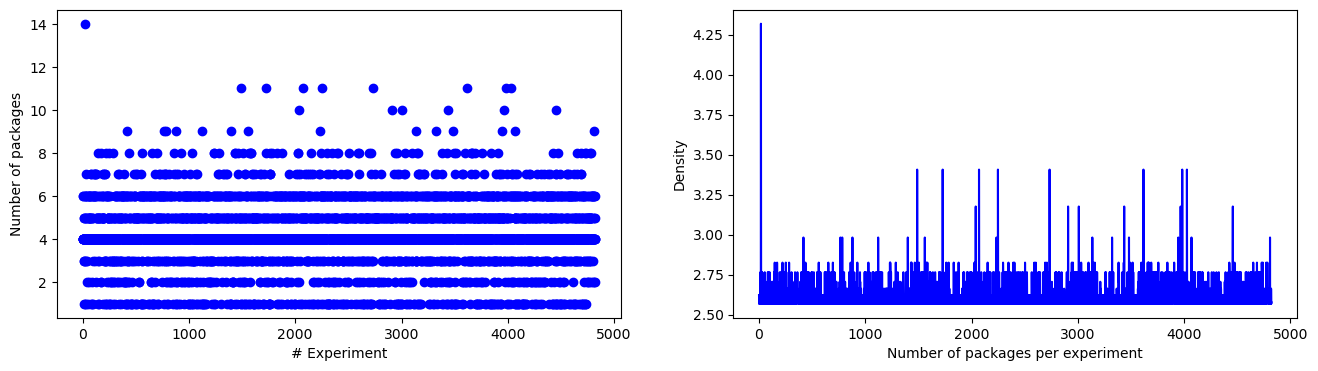

In [4]:
# plotting data (number of packages for each experiment ID) and its distribution 
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
ax[0].scatter(np.arange(number_experiments), number_packages_per_experiment, color='b')
ax[0].set_xlabel('# Experiment')
ax[0].set_ylabel('Number of packages')
# estimating distribution of number of packages per experiment using Kernel Density Estimation
number_packages_per_experiment_arr = np.array(number_packages_per_experiment).reshape(-1, 1)
whole_interval = np.arange(0, number_experiments, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=5)
kde.fit(number_packages_per_experiment_arr)
density = kde.score_samples(number_packages_per_experiment_arr)
ax[1].plot(whole_interval, -density, color='b')
ax[1].set_xlabel('Number of packages per experiment')
ax[1].set_ylabel('Density')
plt.show()

1.3

In [5]:
clicks = data['clicks']
impressions = data['impressions']
ctr = clicks/impressions
# adding the column to the dataframe
data['ctr'] = ctr
data.head(3)

,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week,ctr
0,2014-11-20 06:43:16.005,2016-04-02 16:33:38.062,546d88fb84ad38b2ce000024,Things that matter. Pass 'em on.,They're Being Called 'Walmart's Worst Nightmar...,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,546d6fa19ad54eec8d00002d,3052,150,100.0,True,True,Anyone who's ever felt guilty about shopping a...,NaN,201446,0.049148
1,2014-11-20 06:54:36.335,2016-04-02 16:25:54.027,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546bc55335992b86c8000043,3526,90,4.1,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.025525
2,2014-11-20 06:54:57.878,2016-04-02 16:31:45.671,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714cd2dd00002e,3506,120,100.0,True,False,"If you ever wondered, ""but what about the men?...",NaN,201446,0.034227


1.4

In [6]:
# removing duplicate headlines
new_data_headline = data.drop_duplicates(subset=['headline'], keep='first')
new_data_headline.reset_index(drop=True, inplace=True)
print('Length of the new dataframe: ', len(new_data_headline))
print('Number of discarded experiments: ', len(data)-len(new_data_headline))

Length of the new dataframe:  12387
Number of discarded experiments:  8216


1.5 

In [7]:
new_data_image = data.drop_duplicates(subset=['eyecatcher_id'], keep='first')
new_data_image.reset_index(drop=True, inplace=True)
print('Length of the new datafram: ', len(new_data_image))
print('Number of discarded experiments: ', len(data)-len(new_data_image))

Length of the new datafram:  9679
Number of discarded experiments:  10924


1.6

**Answer:** From the above results, we can conclude that number of packages with similar images are more than number of packages with similar headlines.

1.7

In [8]:
headline = list(new_data_headline['headline'])
lede = list(new_data_headline['lede'])
eyecatcher_id = list(new_data_headline['eyecatcher_id'])
excerpt = list(new_data_headline['excerpt'])

matches_for_pairing = []

for i in range(len(new_data_headline)):
    current_headline = headline[i]
    current_lede = lede[i]
    current_eyecatcher_id = eyecatcher_id[i]
    current_excerpt = excerpt[i]
    
    similar_lede_index = new_data_headline[new_data_headline['lede']==current_lede].index
    similar_eyecatcher_id_index = new_data_headline[new_data_headline['eyecatcher_id']==current_eyecatcher_id].index
    similar_excerpt_index = new_data_headline[new_data_headline['excerpt']==current_excerpt].index
    
    similar_lede_index_set = set(similar_lede_index)
    similar_eyecatcher_id_index_set = set(similar_eyecatcher_id_index)
    similar_excerpt_index_set = set(similar_excerpt_index)
    
    temp = similar_lede_index_set.intersection(similar_eyecatcher_id_index_set)
    final_indexes = temp.intersection(similar_excerpt_index_set)
    final_indexes = list(final_indexes)
    
    matches_for_pairing.append(final_indexes)

In [9]:
# removing duplicate items
matches_for_pairing.sort()
matches_for_pairing_unique = list(matches_for_pairing for matches_for_pairing,_ in itertools.groupby(matches_for_pairing))

In [10]:
ctr = list(new_data_headline['ctr'])
created_at = list(new_data_headline['created_at'])

In [11]:
# rows of the new dataframe
headlines1 = []
headlines2 = []
data_created = []
ctrs1 = []
ctrs2 = []
ledes = []
eyecatcher_ids = []
excerpts = []

# looping over all possible pairs of headlines 
for list_ in matches_for_pairing_unique:
    if len(list_)==0 or len(list_)==1:
        pass
    else:
        pairs = list(itertools.combinations(list_, 2))
        
        for pair in pairs:
            if ctr[pair[0]]>ctr[pair[1]]:
                ctr1 = ctr[pair[0]]
                ctr2 = ctr[pair[1]]
                headline1 = headline[pair[0]]
                headline2 = headline[pair[1]]
                data_created_ = created_at[pair[0]] 
                lede_ = lede[pair[0]]
                excerpt_ = excerpt[pair[0]]
                eyecatcher_id_ = eyecatcher_id[pair[0]]
                
                headlines1.append(headline1)
                headlines2.append(headline2)
                data_created.append(data_created_)
                ctrs1.append(ctr1)
                ctrs2.append(ctr2)
                ledes.append(lede_)
                eyecatcher_ids.append(eyecatcher_id_)
                excerpts.append(excerpt_)                  
                
            elif ctr[pair[0]]<ctr[pair[1]]:
                ctr1 = ctr[pair[1]]
                ctr2 = ctr[pair[0]]
                headline1 = headline[pair[1]]
                headline2 = headline[pair[0]]
                data_created_ = created_at[pair[1]] 
                lede_ = lede[pair[0]]
                excerpt_ = excerpt[pair[0]]
                eyecatcher_id_ = eyecatcher_id[pair[0]]

                headlines1.append(headline1)
                headlines2.append(headline2)
                data_created.append(data_created_)
                ctrs1.append(ctr1)
                ctrs2.append(ctr2)
                ledes.append(lede_)
                eyecatcher_ids.append(eyecatcher_id_)
                excerpts.append(excerpt_)
            else:
                pass    

In [12]:
# creating the new dataframe
new_dataframe = pd.DataFrame()
new_dataframe['date_created'] = data_created
new_dataframe['headline1'] = headlines1
new_dataframe['headline2'] = headlines2
new_dataframe['lede'] = ledes
new_dataframe['excerpt'] = excerpts
new_dataframe['eyecatcher_id'] = eyecatcher_ids
new_dataframe['ctr1'] = ctrs1
new_dataframe['ctr2'] = ctrs2

In [13]:
new_dataframe.head(5)

,date_created,headline1,headline2,lede,excerpt,eyecatcher_id,ctr1,ctr2
0,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,What They Learned From The Scientist Was Terri...,<p>Some decent guys fighting for an important ...,Things that matter. Pass 'em on.,546c7f2dbadeb5788700000a,0.012689,0.011101
1,2014-11-20 14:57:52.478,What They Learned From The Scientist Was Terri...,He Sat Them Down And Told Them About An Immine...,<p>Some decent guys fighting for an important ...,Things that matter. Pass 'em on.,546c7f2dbadeb5788700000a,0.011101,0.005868
2,2014-11-20 15:13:36.266,"The 3 Of Them Needed To See It In Person, And ...",What They Learned From The Scientist Was Terri...,<p>Some decent guys fighting for an important ...,Things that matter. Pass 'em on.,546c7f2dbadeb5788700000a,0.013795,0.011101
3,2014-11-20 14:57:52.478,What They Learned From The Scientist Was Terri...,"They May Not Be The Most Handsome Dudes, But T...",<p>Some decent guys fighting for an important ...,Things that matter. Pass 'em on.,546c7f2dbadeb5788700000a,0.011101,0.009726
4,2014-11-20 15:09:47.669,He Showed Them Some Slides That Freaked Them O...,What They Learned From The Scientist Was Terri...,<p>Some decent guys fighting for an important ...,Things that matter. Pass 'em on.,546c7f2dbadeb5788700000a,0.011568,0.011101


1.8

In [14]:
ctr_difference_per_pair = np.array(ctrs1) - np.array(ctrs2)
avg_ctr_difference_per_pair = np.mean(ctr_difference_per_pair)
ctr2_avg = np.mean(np.array(ctrs2))
print("Average difference of ctrs per pair:", avg_ctr_difference_per_pair)
print("Average of ctr2: ", ctr2_avg)

Average difference of ctrs per pair: 0.004241683102631814
Average of ctr2:  0.010853389807026773


1.9

**Answer**: As we can see, the average of ctr2 (which is the least click through rate between each pair) is about 0.01, while the average of difference between clicktrhough rates of pairs is about 0.0042 which is not significant comparing to ctr2 values; so we can conclude that ctr1 and ctr2 for each pair are not significantly different and thus headlines shouldn't have much effect on the site engagement.

## Task 2: Extracting signals from the data

Your second task is to extract meaningful signals from the data. 
We start this task from the dataset obtained in **T1.7**. 
Recall that we have one A/B test per row with the clickthrough rate of two news pieces that differ only in their headline. 
We refer to the version with the higher clickthrough rate as the "winner" and the version with the lower as the "loser." 
(Note that this is not the same as the column `winner` in the original data, which captures a similar concept but considering the original experiments, where multiple comparisons were made!)
 
2.1 Using the function provided below, count the number of words in each headline, creating columns `numwords1` and `numwords2` corresponding to the number of words in the winner and loser headlines.

2.2 Using the dictionary of pronouns provided below, create indicator variables corresponding to each set of pronouns (e.g., first-person singular may yield columns `first_person_singular1` and `first_person_singular2` for the headlines in each A/B test). 
Each indicator variable in the dataframe should equal 1 if the corresponding headline uses the corresponding type of pronoun and 0 otherwise. 
Your code should be agnostic to lower/upper case.

2.3 One easy way to classify sentiment is simply to match negative or positive words. 
    Use the lists of words (positive and negative files in `data` folder) to obtain "positive sentiment" and "negative sentiment" scores for each headline. Create columns `positive1`/`positive2` and `negative1`/`negative2` containing indicator variables for positive and negative sentiment, i.e., A headline has a "positive sentiment" (or negative) score equal 1 if it contains at least one positive (or negative) sentiment word on the list. Otherwise, its "positive sentiment" (or negative) score equals 0.
    
[1]: https://ptrckprry.com/course/ssd/data/positive-words.txt
[2]: https://ptrckprry.com/course/ssd/data/negative-words.txt

--- 

**Comments**

- For **T2.3**, beware of encodings!

2.1

In [15]:
def count_words_simple(x):
    return len(x.split(" "))
#str_test = "How many words are here?"
#print(str_test, count_words_simple(str_test))
numwords1 = [count_words_simple(item) for item in headlines1]
numwords2 = [count_words_simple(item) for item in headlines2]
new_dataframe['numwords1'] = numwords1
new_dataframe['numwords2'] = numwords2

In [16]:
new_dataframe.head(5)

,date_created,headline1,headline2,lede,excerpt,eyecatcher_id,ctr1,ctr2,numwords1,numwords2
0,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,What They Learned From The Scientist Was Terri...,<p>Some decent guys fighting for an important ...,Things that matter. Pass 'em on.,546c7f2dbadeb5788700000a,0.012689,0.011101,14,15
1,2014-11-20 14:57:52.478,What They Learned From The Scientist Was Terri...,He Sat Them Down And Told Them About An Immine...,<p>Some decent guys fighting for an important ...,Things that matter. Pass 'em on.,546c7f2dbadeb5788700000a,0.011101,0.005868,15,19
2,2014-11-20 15:13:36.266,"The 3 Of Them Needed To See It In Person, And ...",What They Learned From The Scientist Was Terri...,<p>Some decent guys fighting for an important ...,Things that matter. Pass 'em on.,546c7f2dbadeb5788700000a,0.013795,0.011101,21,15
3,2014-11-20 14:57:52.478,What They Learned From The Scientist Was Terri...,"They May Not Be The Most Handsome Dudes, But T...",<p>Some decent guys fighting for an important ...,Things that matter. Pass 'em on.,546c7f2dbadeb5788700000a,0.011101,0.009726,15,16
4,2014-11-20 15:09:47.669,He Showed Them Some Slides That Freaked Them O...,What They Learned From The Scientist Was Terri...,<p>Some decent guys fighting for an important ...,Things that matter. Pass 'em on.,546c7f2dbadeb5788700000a,0.011568,0.011101,16,15


2.2

In [17]:
feature_wordsets = dict([
    # https://en.wikipedia.org/wiki/English_personal_pronouns
    ('first_person_singular', ['i', 'me', 'my', 'mine', 'myself',
                               "i'd", "i'll", "i'm", "i've", 'id', 'im', 'ive']),
    ('first_person_plural', ['we', 'us', 'our', 'ours', 'ourselves',
                              "we'd", "we'll", "we're", "we've",]),
    ('second_person', ['you','your','yours','yourself',
                              "ya", "you'd", "you'll", "you're", "you've", 'youll', 'youre', 'youve', 
                              'yourselves']),
    ('third_person_singular', ['he','him','his','himself',
                               "he'd", "he's", 'hes',
                               'she','her','hers','herself', 
                               "she'll", "she's", 'shes',
                               'it','its','itself',
                               'themself']),
    ('third_person_plural', ['they','them','their','theirs','themselves',
                              "they'd", "they'll", "they've", 'theyll', 'theyve'])
])

In [18]:
# function for calculating indicator corresponding to eac pronoun category
def indicator_calculator(headline_):
    
    first_person_singular = []
    first_person_plural = []
    second_person = []
    third_person_singular = []
    third_person_plural = []
    
    for item in headline_:

        count_first_person_singular = 0
        count_first_person_plural = 0
        count_second_person = 0
        count_third_person_singular = 0
        count_third_person_plural = 0
        
        for pronoun in feature_wordsets['first_person_singular']:
            if pronoun in item:
                count_first_person_singular = 1

        for pronoun in feature_wordsets['first_person_plural']:
            if pronoun in item:
                count_first_person_plural = 1

        for pronoun in feature_wordsets['second_person']:
            if pronoun in item:
                count_second_person = 1 

        for pronoun in feature_wordsets['third_person_singular']:
            if pronoun in item:
                count_third_person_singular = 1
                
        for pronoun in feature_wordsets['third_person_plural']:
            if pronoun in item:
                count_third_person_plural = 1
        
        first_person_singular.append(count_first_person_singular)
        first_person_plural.append(count_first_person_plural)
        second_person.append(count_second_person)
        third_person_singular.append(count_third_person_singular)
        third_person_plural.append(count_third_person_plural)
        
    return first_person_singular, first_person_plural, second_person, third_person_singular, third_person_plural


first_person_singular1, first_person_plural1, second_person1, third_person_singular1, third_person_plural1 = indicator_calculator(headlines1)
first_person_singular2, first_person_plural2, second_person2, third_person_singular2, third_person_plural2 = indicator_calculator(headlines2)

# adding these columns to dataframe
new_dataframe['first_person_singular1'] = first_person_singular1
new_dataframe['first_person_plural1'] = first_person_plural1
new_dataframe['second_person1'] = second_person1
new_dataframe['third_person_singular1'] = third_person_singular1
new_dataframe['third_person_plural1'] = third_person_plural1

new_dataframe['first_person_singular2'] = first_person_singular2
new_dataframe['first_person_plural2'] = first_person_plural2
new_dataframe['second_person2'] = second_person2
new_dataframe['third_person_singular2'] = third_person_singular2
new_dataframe['third_person_plural2'] = third_person_plural2

In [19]:
new_dataframe.head(5)

,date_created,headline1,headline2,lede,excerpt,eyecatcher_id,ctr1,ctr2,numwords1,numwords2,first_person_singular1,first_person_plural1,second_person1,third_person_singular1,third_person_plural1,first_person_singular2,first_person_plural2,second_person2,third_person_singular2,third_person_plural2
0,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,What They Learned From The Scientist Was Terri...,<p>Some decent guys fighting for an important ...,Things that matter. Pass 'em on.,546c7f2dbadeb5788700000a,0.012689,0.011101,14,15,1,0,0,1,0,1,0,0,1,0
1,2014-11-20 14:57:52.478,What They Learned From The Scientist Was Terri...,He Sat Them Down And Told Them About An Immine...,<p>Some decent guys fighting for an important ...,Things that matter. Pass 'em on.,546c7f2dbadeb5788700000a,0.011101,0.005868,15,19,1,0,0,1,0,1,1,0,1,0
2,2014-11-20 15:13:36.266,"The 3 Of Them Needed To See It In Person, And ...",What They Learned From The Scientist Was Terri...,<p>Some decent guys fighting for an important ...,Things that matter. Pass 'em on.,546c7f2dbadeb5788700000a,0.013795,0.011101,21,15,1,0,0,1,0,1,0,0,1,0
3,2014-11-20 14:57:52.478,What They Learned From The Scientist Was Terri...,"They May Not Be The Most Handsome Dudes, But T...",<p>Some decent guys fighting for an important ...,Things that matter. Pass 'em on.,546c7f2dbadeb5788700000a,0.011101,0.009726,15,16,1,0,0,1,0,1,0,0,1,0
4,2014-11-20 15:09:47.669,He Showed Them Some Slides That Freaked Them O...,What They Learned From The Scientist Was Terri...,<p>Some decent guys fighting for an important ...,Things that matter. Pass 'em on.,546c7f2dbadeb5788700000a,0.011568,0.011101,16,15,1,1,0,1,0,1,0,0,1,0


2.3

In [20]:
# data paths
positive_words_path = 'data/positive-words.txt'
negative_words_path = 'data/negative-words.txt'

In [21]:
# reading the txt files
positive_file = open(positive_words_path, 'r')
negative_file = open(negative_words_path, 'r', encoding = 'latin-1')
# reading the lines
positive_lines = positive_file.read().splitlines()
positive_words = positive_lines[35:]
negative_lines = negative_file.read().splitlines()
negative_words = negative_lines[35:]

In [22]:
def sentiment_calculator(headlines):
    
    sentiment_indicator_positive = []
    sentiment_indicator_negative = []
    
    for headline in headlines:
        positive_counter = 0
        negative_counter = 0
        for item in positive_words:
            if item in headline:
                positive_counter = 1
                break
        for item in negative_words:
            if item in headline:
                negative_counter = 1
                break
        
        sentiment_indicator_positive.append(positive_counter)
        sentiment_indicator_negative.append(negative_counter)
                
    return sentiment_indicator_positive, sentiment_indicator_negative

In [23]:
positive1, negative1 = sentiment_calculator(headlines1)
positive2, negative2 = sentiment_calculator(headlines2)

In [24]:
# adding to dataframe
new_dataframe['positive1'] = positive1
new_dataframe['positive2'] = positive2
new_dataframe['negative1'] = negative1
new_dataframe['negative2'] = negative2

In [25]:
new_dataframe.head(3)

,date_created,headline1,headline2,lede,excerpt,eyecatcher_id,ctr1,ctr2,numwords1,numwords2,...,third_person_plural1,first_person_singular2,first_person_plural2,second_person2,third_person_singular2,third_person_plural2,positive1,positive2,negative1,negative2
0,2014-11-20 14:54:18.78,A Science Guy Helps 3 Dudes From America Under...,What They Learned From The Scientist Was Terri...,<p>Some decent guys fighting for an important ...,Things that matter. Pass 'em on.,546c7f2dbadeb5788700000a,0.012689,0.011101,14,15,...,0,1,0,0,1,0,1,0,0,1
1,2014-11-20 14:57:52.478,What They Learned From The Scientist Was Terri...,He Sat Them Down And Told Them About An Immine...,<p>Some decent guys fighting for an important ...,Things that matter. Pass 'em on.,546c7f2dbadeb5788700000a,0.011101,0.005868,15,19,...,0,1,1,0,1,0,0,0,1,0
2,2014-11-20 15:13:36.266,"The 3 Of Them Needed To See It In Person, And ...",What They Learned From The Scientist Was Terri...,<p>Some decent guys fighting for an important ...,Things that matter. Pass 'em on.,546c7f2dbadeb5788700000a,0.013795,0.011101,21,15,...,0,1,0,0,1,0,0,0,0,1


## Task 3: Estimating the effect of language on headline success

Your third task revolves around the question *how does language impact headlines' success?*

3.1 First, we examine whether the winner headlines have more or fewer words than the loser headline. Conduct an independent sample t-test and paired t-test (see [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind); for the independent sample t-test, assume equal variance). Also, calculate and print the mean difference between the number of words in the winner and the loser headlines.

3.2 **Discuss:** Are longer headlines more successful? Justify.

3.3 The [t-statistic](https://en.wikipedia.org/wiki/T-statistic) is the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error. In a t-test, the higher the t-statistic, the more confidently we can reject the null hypothesis. Use `numpy.random` to create four samples, each of size 30:
- $X \sim Uniform(0,1)$
- $Y \sim Uniform(0,1)$
- $Z = X/2 + Y/2 + 0.1$
- $K = Y + 0.1$
    
3.4 **Discuss:** What are the expected values and the variance of $X$, $Y$, $Z$, and $K$? (You don't need to justify them!)

3.5 Run the following simulation 10000 times, storing the $p$-values for the tests at each run:
- Sample new values  for $X$, $Y$, $Z$ and $K$ ($n=30$ each). 
- Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $Z$.
-  Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $K$.

3.6 Recall that the power of a binary hypothesis test is the probability that the test correctly rejects the null hypothesis when the alternative hypothesis is true. Using the p-values and assuming that we reject the null hypothesis if $p < 0.05$, calculate the statistical power of:
- The independent sample t-test comparing $X$ and $Z$.
- The paired t-test comparing $X$ and $Z$.
- The independent sample t-test comparing $X$ and $K$.
- The paired t-test comparing $X$ and $K$.
    
3.7 **Discuss:** When are paired t-tests helpful? Justify.

3.8 With a bootstrapping approach (implemented by yourself, you should not use existing bootstrapping functions), estimate the average difference and 95% confidence intervals for:
- the mean ratio between the number of words in the winner headline and the loser headline (i.e., the number of words in the winner headline divided by the number of words in the loser headlines).
- the difference in usage of positive words between winner and loser headlines.
- the difference in usage of negative words between winner and loser headlines.
- The difference in usage of each type of pronoun between winner and loser headlines.

3.9 **Discuss:** According to the results obtained in **T3.8**, what headlines grab people's attention the most? Justify your answer.
    
---
**Comments:**

- Paired t-test formula: $t = \frac{\overline{x}_{\mathrm{diff}}}{s_{\mathrm{diff}} / \sqrt n }$ where:
    - $\overline{x}_{\mathrm{diff}}$ is the sample difference between the means of the matched sample; and
    - $s_{\mathrm{diff}}$ is the sample variance of the matched sample; and
    - $n$ is the number of matched samples.
    
- Independent samples t-test formula: $t = \frac{\overline{x}_{1} - \overline{x}_{2}}{\sqrt{\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}}}$ where:
    - $\overline{x}_{\mathrm{1}}$ is the sample mean of the first group; and
    - $s_{\mathrm{1}}$ is the sample variance of the first group; and
    - $n_1$ is the number of samples in the first group;
    
     
- t-tests are valid for samples of non-normal distribution for large enough samples (a rule of thumb used is: n$\geq$30)!

3.1

In [26]:
numwords1 = new_dataframe['numwords1']
numwords2 = new_dataframe['numwords2']

In [27]:
# independant sample t-test
stats.ttest_ind(numwords1, numwords2)

Ttest_indResult(statistic=9.274897552063727, pvalue=1.880453997767326e-20)

In [28]:
# paired t-test
stats.ttest_rel(numwords1, numwords2)

Ttest_relResult(statistic=11.11481247754717, pvalue=1.336244985795982e-28)

In [29]:
numwords_diff = numwords1 - numwords2
numwords_diff_mean = np.mean(numwords_diff)
print("Mean difference between the number of words in the winner and the loser headlines: ", numwords_diff_mean)

Mean difference between the number of words in the winner and the loser headlines:  0.30650522317188983


3.3

In [30]:
X = np.random.rand(30)
Y = np.random.rand(30)
Z = X/2 + Y/2 + 0.1
K = Y + 0.1

3.4

**Answer:** 

$ E(X) = E(7) = 1/30 $

$ E(Z) = 0.5*E(X) + 0.5*E(Y) = 1/30 $

$ E(K) = E(Y) = 1/30 $

3.5

In [31]:
p_XZ_ind = []
p_XZ_rel = []
p_XK_ind = []
p_XK_rel = []
for i in range(10000):
    X = np.random.rand(30)
    Y = np.random.rand(30)
    Z = X/2 + Y/2 + 0.1
    K = Y + 0.1
    # running independant t-test comparing X and Z
    st1, p1 = stats.ttest_ind(X, Z)
    p_XZ_ind.append(p1)
    # running paired t-test comparing X and Z
    st2, p2 = stats.ttest_rel(X, Z)
    p_XZ_rel.append(p2)
    # running independant t-test comparing X and K
    st3, p3 = stats.ttest_ind(X, K)
    p_XK_ind.append(p3)
    # running paired t-test comparing X and K
    st4, p4 = stats.ttest_rel(X, K)
    p_XK_rel.append(p4)

3.6

In [32]:
power_XZ_ind = (sum(i<0.05 for i in p_XZ_ind))/10000
power_XZ_rel = (sum(i<0.05 for i in p_XZ_rel))/10000
power_XK_ind = (sum(i<0.05 for i in p_XK_ind))/10000
power_XK_rel = (sum(i<0.05 for i in p_XK_rel))/10000
print('Power of test comparing X and Z using independant t-test: ', power_XZ_ind)
print('Power of test comparing X and Z using paird t-test: ', power_XZ_rel)
print('Power of test comparing X and K using independant t-test: ', power_XK_ind)
print('Power of test comparing X and K using paired t-test: ', power_XK_rel)

Power of test comparing X and Z using independant t-test:  0.2299
Power of test comparing X and Z using paird t-test:  0.7313
Power of test comparing X and K using independant t-test:  0.2579
Power of test comparing X and K using paired t-test:  0.2479


3.8

For this section, I define two functions. 
The first one calculates the mean and confidence interval (using bootstrap) for a variable. As its inputs, it takes the dataframe, the column name for which we want to do the estimation, bootstrap sample size and number of time the bootstrap resampling should be repeated. Also the alpha parameter in input is the confidence interval parameter. As we want to calculate 95% confidence interval, its default value is set to 0.05.
The second function computes the average difference between samples of two variables, and the confidence interval corresponding to this mean. Inputs for this function are the same as of the previous function, except for the columns input which takes two column names.

In [33]:
def bootstrap_mean_ci(data_frame, column, sample_size, n_resample, alpha=0.05):
    column_df = data_frame[column]
    mean_ = column_df.mean()
    mean_est = [] # estimation of mean
    for i in range(n_resample):
        # generating bootstrap samples
        bootstraps_df = column_df.sample(n=sample_size, replace=True)
        # calculating the mean
        mean_est.append(bootstraps_df.mean())
    # calculating the confidence interval
    ci_inter1 = np.percentile(mean_est, 100*alpha/2)
    ci_inter2 = np.percentile(mean_est, 100-100*alpha/2)
    ci = (round(ci_inter1, 3), round(ci_inter2, 3))
    return round(mean_, 3), ci
        
def bootstrap_mean_diff_ci(data_frame, columns, sample_size ,n_resample, alpha=0.05):
    columns_df = data_frame[columns]
    mean_diff = np.mean(columns_df[columns[0]] - columns_df[columns[1]])
    mean_diff_est = [] # estimation of average
    for i in range(n_resample):
        # generating bootstrap samples
        bootstraps_df = columns_df.sample(n=sample_size, replace=True)
        # calculating the mean difference
        mean_diff_est.append(np.mean(bootstraps_df[columns[0]] - bootstraps_df[columns[1]]))
    # calculating confidence interval
    ci_inter1 = np.percentile(mean_diff_est, 100*alpha/2)
    ci_inter2 = np.percentile(mean_diff_est, 100-100*alpha/2)
    ci = (round(ci_inter1, 3), round(ci_inter2, 3))
    return round(mean_diff,3) , ci

In [34]:
sample_size = new_dataframe.shape[0] # setting bootstrap sample size to number of rows of the dataframe
# calculating ratio between numwords1 and numwords2 and adding it as a column to the dataframe
numwords_ratio = new_dataframe['numwords1'] / new_dataframe['numwords2']
new_dataframe['numwords_ratio'] = numwords_ratio

numwords_ratio_mean, numwords_ratio_ci = bootstrap_mean_ci(new_dataframe, 'numwords_ratio', sample_size, 1000, 0.05)
positive_mean_diff, positive_ci = bootstrap_mean_diff_ci(new_dataframe, ['positive1', 'positive2'], sample_size, 1000, 0.05)
negative_mean_diff, negative_ci = bootstrap_mean_diff_ci(new_dataframe, ['negative1', 'negative2'], sample_size, 1000, 0.05)
first_person_singular_mean_diff, first_person_singular_ci = bootstrap_mean_diff_ci(new_dataframe, ['first_person_singular1', 'first_person_singular2'], sample_size, 1000, 0.05)
first_person_plural_mean_diff, first_person_plural_ci = bootstrap_mean_diff_ci(new_dataframe, ['first_person_plural1', 'first_person_plural2'], sample_size, 1000, 0.05)
second_person_mean_diff, second_person_ci = bootstrap_mean_diff_ci(new_dataframe, ['second_person1', 'second_person2'], sample_size, 1000, 0.05)
third_person_singular_mean_diff, third_person_singular_ci = bootstrap_mean_diff_ci(new_dataframe, ['third_person_singular1', 'third_person_singular2'], sample_size, 1000, 0.05)
third_person_plural_mean_diff, third_person_plural_ci = bootstrap_mean_diff_ci(new_dataframe, ['third_person_plural1', 'third_person_plural2'], sample_size, 1000, 0.05)


In [35]:
# printing the results
print('numwords ratio:  mean =', numwords_ratio_mean, ' , CI =', numwords_ratio_ci)
print('positive sentiment:  mean difference =', positive_mean_diff, ' , CI =', positive_ci)
print('negative sentiment:  mean difference =', negative_mean_diff, ' , CI =', negative_ci)
print('first person singular:  mean difference =', first_person_singular_mean_diff, ' , CI =', first_person_singular_ci)
print('first person plural:  mean difference =', first_person_plural_mean_diff, ' , CI =', first_person_plural_ci)
print('second person:  mean difference =', second_person_mean_diff, ' , CI =', second_person_ci)
print('third person singular:  mean difference =', third_person_singular_mean_diff, ' , CI =', third_person_singular_ci)
print('third person plural:  mean difference =', third_person_plural_mean_diff, ' , CI =', third_person_plural_ci)


numwords ratio:  mean = 1.064  , CI = (1.059, 1.068)
positive sentiment:  mean difference = 0.008  , CI = (0.002, 0.015)
negative sentiment:  mean difference = -0.008  , CI = (-0.018, 0.001)
first person singular:  mean difference = 0.004  , CI = (0.001, 0.007)
first person plural:  mean difference = -0.01  , CI = (-0.018, -0.002)
second person:  mean difference = -0.0  , CI = (-0.003, 0.002)
third person singular:  mean difference = 0.009  , CI = (0.002, 0.017)
third person plural:  mean difference = 0.001  , CI = (-0.001, 0.003)


3.9

**Answer:** From the above results we can conclude that headlines with more words, containing more positive sentiments and less negative sentiments grab larger attention.
Also, headlines containing more first person singular pronouns, less first person plural pronouns and more third person pronouns are more successful in obtatining vositors' engagements.

## Task 4: Temporal validity and heterogeneity of the effect.

Last, we investigate how the effects studied in **T3** change with time and how they might be heterogeneous across different types of news.

4.1 Create a plot where you depict the monthly average number of words in winner and loser headlines. Consider only headlines created after April 2013 (the month of April inclusive). Include also bootstrapped 95% confidence intervals; here, you can use a third-party implementation if you want. Finally, recall that we created a column `date_created` which captures the creation of the winner headline; you can consider this date to correspond to the date of the creation of the A/B test.

4.2 Produce similar plots to each pronoun category, as well as for positive and negative sentiment. Here, unlike in **T4.1**, depict the month averages pooled across winner and loser headlines (i.e., for each month, you calculate the average across both winners and loser headlines).
Create all these plots in a single figure with no more than 11 inches of width and 11 inches of height. Again, consider only headlines created after April 2013 (the month of April inclusive).

4.3 **Discuss:** Has the type of headline Upworthy used in their A/B tests changed with time? Are these changes likely to be producing more or less engaging headlines? Justify.

4.4 Divide your data into two periods, $t_1$, which goes from  April 2013 (inclusive) to March 2014 (inclusive), and $t_2$, which goes from April 2014 (inclusive) to the latest A/B test in the data. Create a dataframe for A/B tests in each period.

4.5 Let's examine if the effects observed remained the same throughout the study period. Use an appropriate methodology  of your choice to determine if the effects observed in **T3.8** (length, each category of pronouns, positive words, and negative words) were different in $t_1$ and $t_2$. Here, note that we are considering "at least one positive outcome" to be the manifestation of an underlying effect, thus significance level must be adjusted down when performing multiple hypothesis tests!

4.6 **Discuss:** Hypothesize two reasons that could have led to a change in the observed effects. According to the analysis done in **T4.5**, have the effects observed remained the same across the study period? 

4.7 The features we are studying may interact with each other. For instance, people may like first person singular pronouns in headlines containing positive words (you are amazing!), but dislike headlines with negative words and first person pronouns (you are awful!). To help answer this question, create:
- a dataframe containing all A/B tests where both winner and loser headlines include a positive word; and
- a dataframe containing all A/B tests where both winner and loser headlines include a negative word;

4.8 Using an appropriate methodology of your choice, determine if the effect of the use of first person singular pronouns in the headline is heterogeneous across headlines with positive words and negative words, i.e., is the effect significantly stronger for one of the dataframes created in **T4.7**? 

4.9 **Discuss:** Considering the analyses you did throughout Tasks 3 and 4, write a short text (no more than 250 words) giving advice to Upworthy employees on how they should try to write engaging headlines. 
You can reference images present in the notebook by indicating a task (e.g., image plotted in **T3.3**) or a cell number. Note that you do not need to conduct any additional analysis to write this text. 


4.1

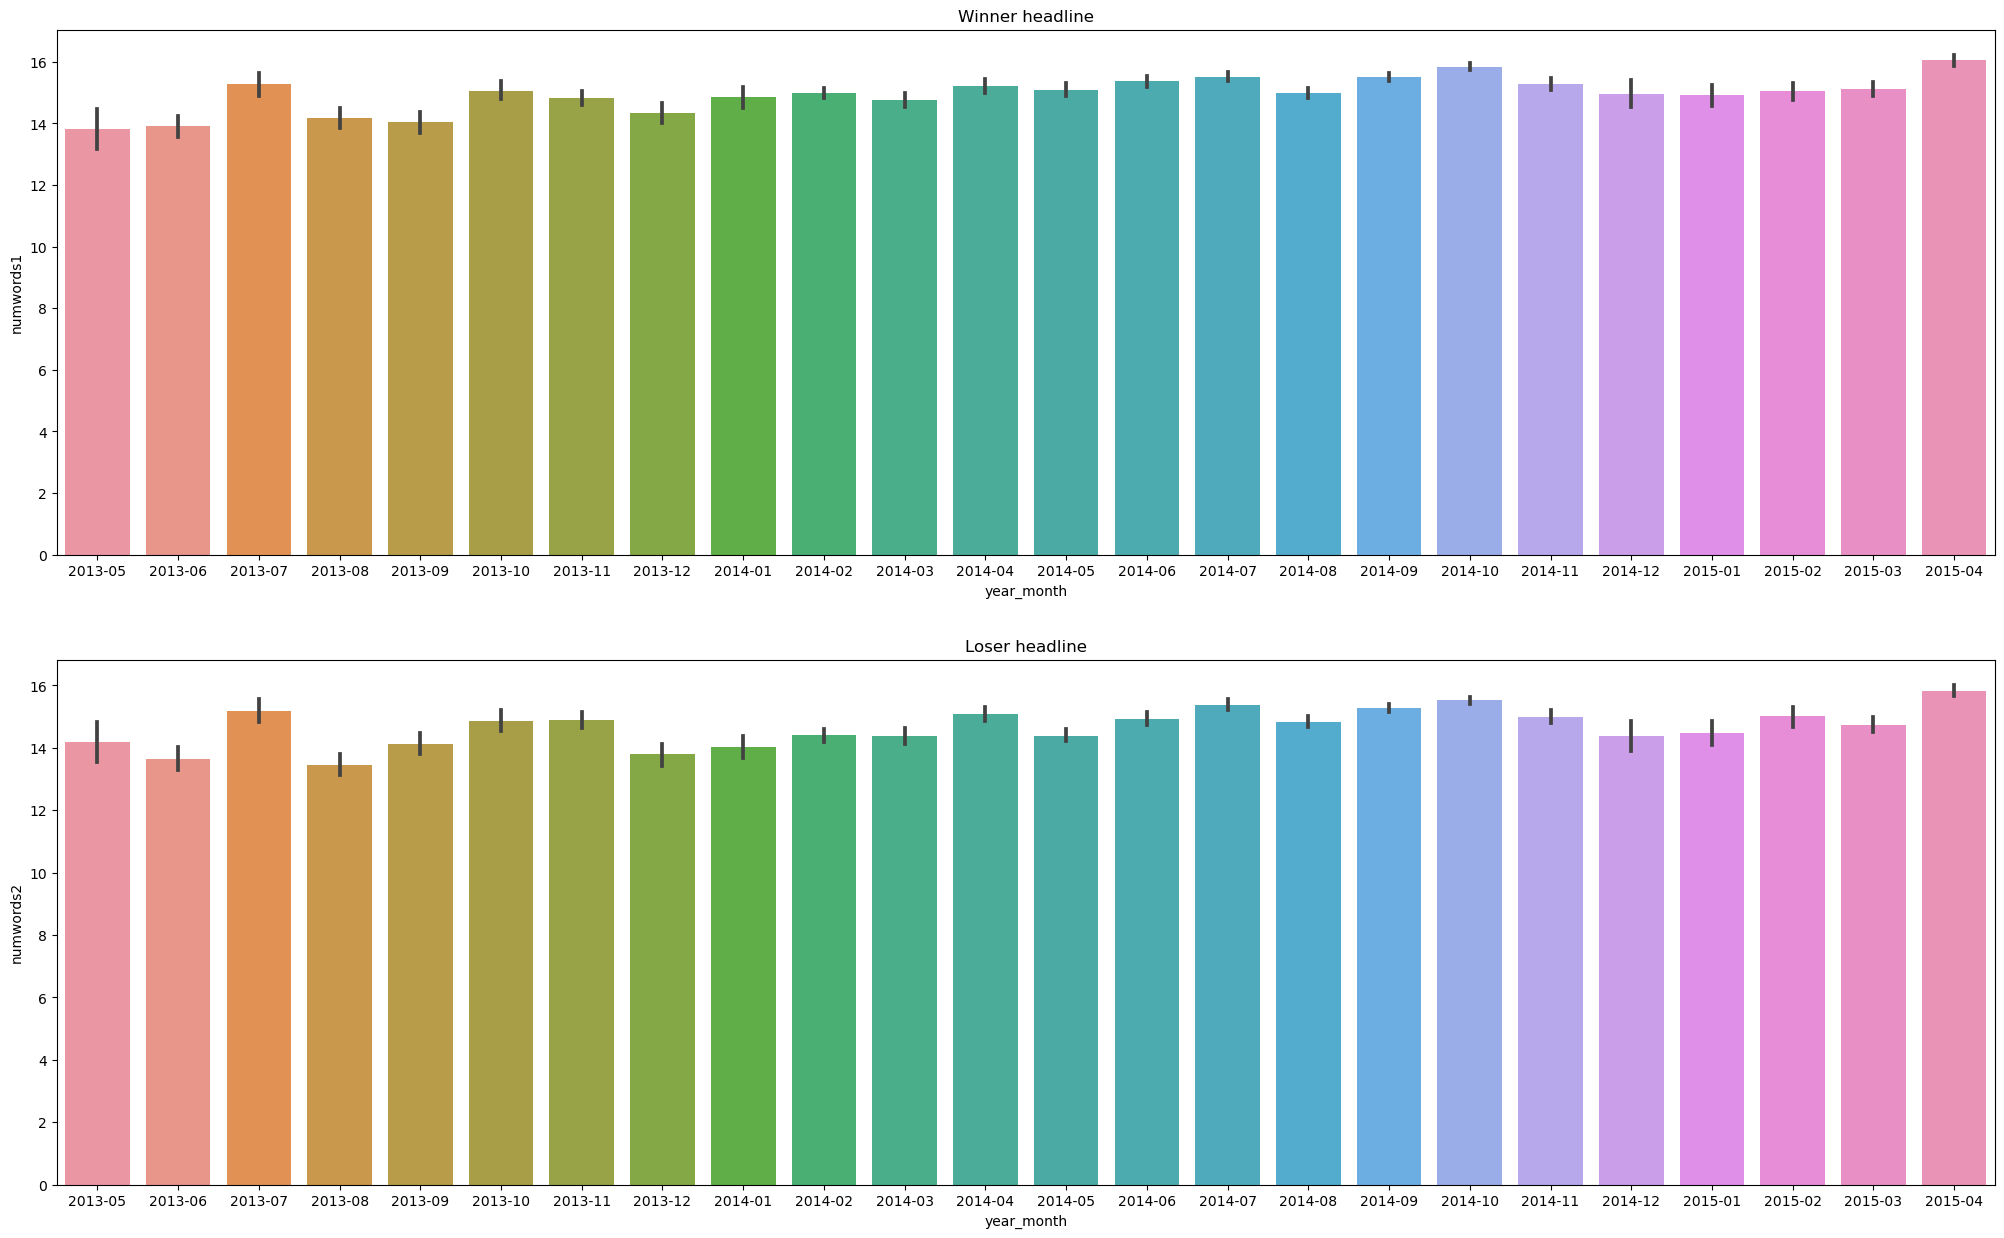

In [36]:
# converting 'date_created' column to datetime type
new_dataframe['date_created'] = pd.to_datetime(new_dataframe['date_created'])
# extracting year and month for each column
year_month = pd.PeriodIndex(new_dataframe['date_created'], freq="M")
new_dataframe['year_month'] = year_month
# sorting the dataframe by date
new_dataframe = new_dataframe.sort_values(by='year_month')
new_dataframe = new_dataframe.reset_index(drop=True)
# data after April 2013
dataa = new_dataframe[177:]

# plotting monthly average and confidence interval for number of words (indexing is used to remove data before April 2013)
fig, ax = plt.subplots(2, 1, figsize=(25, 15))
sns.barplot(x='year_month', y='numwords1', data=dataa[177:], ax=ax[0])
ax[0].set_title('Winner headline')

sns.barplot(x='year_month', y='numwords2', data=dataa[177:], ax=ax[1])
ax[1].set_title('Loser headline')

plt.show()

4.2

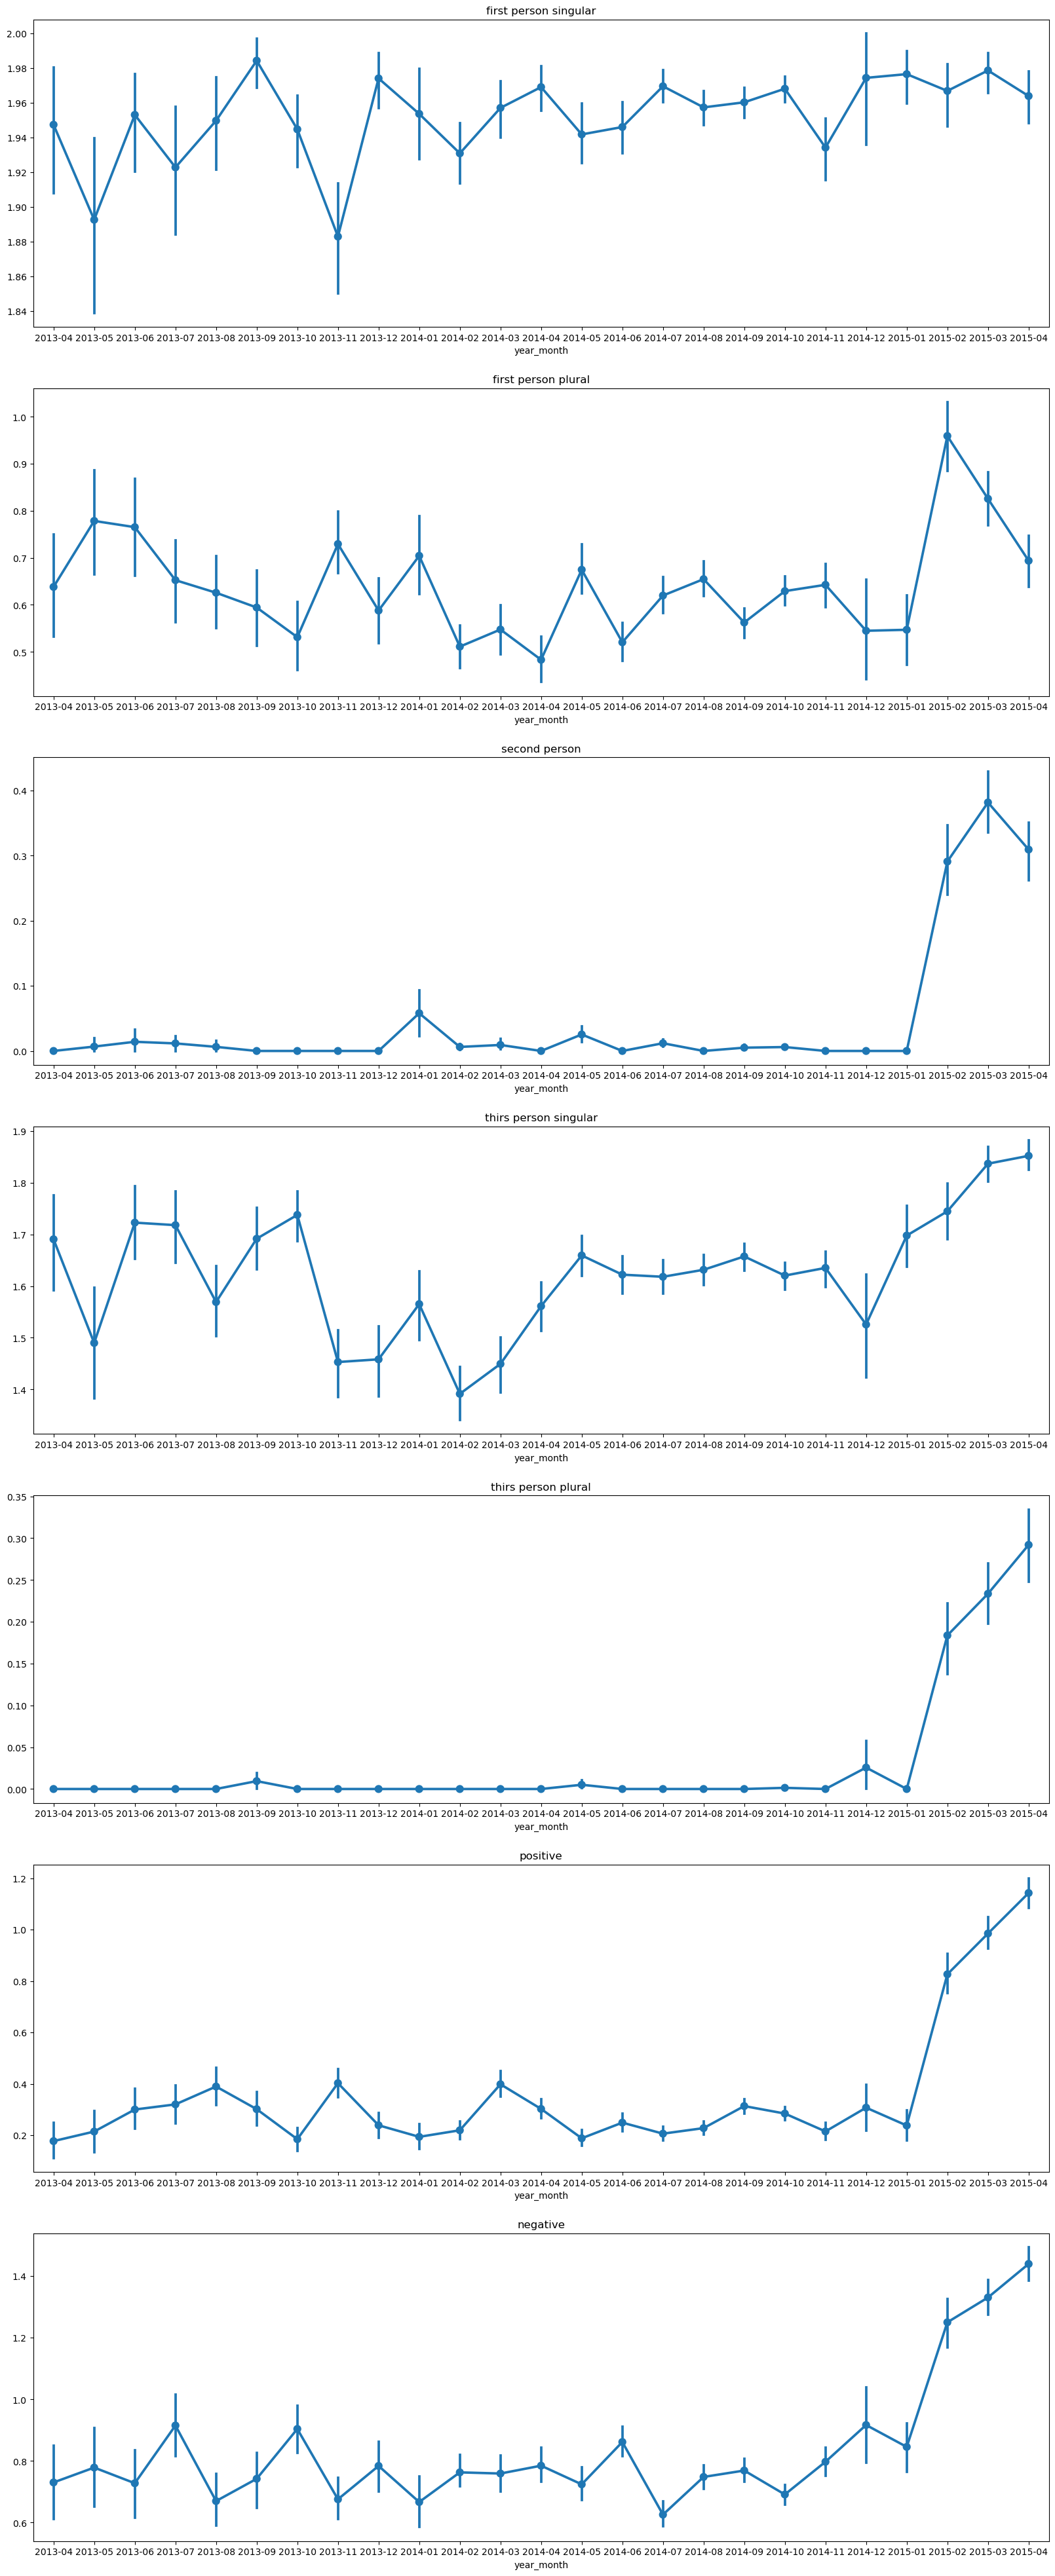

In [37]:
fig, ax = plt.subplots(7, 1, figsize=(20, 50))
sns.pointplot(x='year_month', y=dataa['first_person_singular1'] + dataa['first_person_singular2'], data=dataa, ax=ax[0])
ax[0].set_title('first person singular')
sns.pointplot(x='year_month', y=dataa['first_person_plural1'] + dataa['first_person_plural2'], data=dataa, ax=ax[1])
ax[1].set_title('first person plural')
sns.pointplot(x='year_month', y=dataa['second_person1'] + dataa['second_person2'], data=dataa, ax=ax[2])
ax[2].set_title('second person')
sns.pointplot(x='year_month', y=dataa['third_person_singular1'] + dataa['third_person_singular2'], data=dataa, ax=ax[3])
ax[3].set_title('thirs person singular')
sns.pointplot(x='year_month', y=dataa['third_person_plural1'] + dataa['third_person_plural2'], data=dataa, ax=ax[4])
ax[4].set_title('thirs person plural')
sns.pointplot(x='year_month', y=dataa['positive1'] + dataa['positive2'], data=dataa, ax=ax[5])
ax[5].set_title('positive')
sns.pointplot(x='year_month', y=dataa['negative1'] + dataa['negative2'], data=dataa, ax=ax[6])
ax[6].set_title('negative')
plt.show()

4.3

From the above figures, we can conclude that first person plural has been used less after January 2015.Also it can be seen that the use of second person had increased drastically after January 2015. Uisng thirs person singular and third person plural have also increase for the past three months. Also positive and negative sentiments have been used more frequently in headlines after January 2015.

4.4

In [38]:
# seperating the dataframe to t1 and t2
t1_data = new_dataframe[0:177] # before April 2013
t2_data = new_dataframe[177:]  # after April 2013 (April inclusive)

In [39]:
t1_data.head(3)

,date_created,headline1,headline2,lede,excerpt,eyecatcher_id,ctr1,ctr2,numwords1,numwords2,...,first_person_plural2,second_person2,third_person_singular2,third_person_plural2,positive1,positive2,negative1,negative2,numwords_ratio,year_month
0,2013-01-26 20:10:36,"How To Talk To Scared, Condescending, Misinfor...",Hillary Clinton Makes Dealing With Children Lo...,<p>At the Senate Hearings looking into the Ben...,She tolerates them so you don't have to.,5332ba4e1fae79f09f00326e,0.045988,0.028431,15,12,...,0,0,1,0,0,0,1,0,1.25,2013-01
1,2013-01-26 20:10:36,"How To Talk To Scared, Condescending, Misinfor...",How To Placate A Mansplainer While Ignoring Hi...,<p>At the Senate Hearings looking into the Ben...,She tolerates them so you don't have to.,5332ba4e1fae79f09f00326e,0.045988,0.021934,15,15,...,1,0,1,0,0,0,1,1,1.00,2013-01
2,2013-01-26 20:13:28,Hillary Clinton Makes Dealing With Children Lo...,How To Placate A Mansplainer While Ignoring Hi...,<p>At the Senate Hearings looking into the Ben...,She tolerates them so you don't have to.,5332ba4e1fae79f09f00326e,0.028431,0.021934,12,15,...,1,0,1,0,0,0,0,1,0.80,2013-01


In [40]:
t2_data.head(3)

,date_created,headline1,headline2,lede,excerpt,eyecatcher_id,ctr1,ctr2,numwords1,numwords2,...,first_person_plural2,second_person2,third_person_singular2,third_person_plural2,positive1,positive2,negative1,negative2,numwords_ratio,year_month
177,2013-04-14 02:53:36,The World Through A Magic Genie’s Eyes Is Beau...,The Answer That Could Bring World Peace. Or Ge...,"<p>If I had one wish, it’d be that the guy at ...",Would you give yours up to any of these people?,5332bac51fae79f09f00400f,0.015837,0.008719,14,14,...,1,0,1,0,0,0,1,0,1.000000,2013-04
178,2013-04-14 02:53:36,The World Through A Magic Genie’s Eyes Is Beau...,These People Could Have World Peace. What Did ...,"<p>If I had one wish, it’d be that the guy at ...",Would you give yours up to any of these people?,5332bac51fae79f09f00400f,0.015837,0.014958,14,12,...,0,0,1,0,0,0,1,0,1.166667,2013-04
179,2013-04-03 17:15:54,If You Think Old People Aren't Nearly As Cool ...,Why Getting Older Doesn't Mean Getting Boring-er,<p>Whoa. Don't miss Ellaraino's story about he...,This woman is living proof that you should nev...,5332ba1c1fae79f09f002d2a,0.029357,0.024375,18,7,...,0,0,0,0,0,0,0,0,2.571429,2013-04


4.7

In [41]:
data_both_positive = new_dataframe[new_dataframe.positive1==new_dataframe.positive2]
data_both_negative = new_dataframe[new_dataframe.negative1==new_dataframe.negative2]

In [42]:
data_both_positive.head(3)

,date_created,headline1,headline2,lede,excerpt,eyecatcher_id,ctr1,ctr2,numwords1,numwords2,...,first_person_plural2,second_person2,third_person_singular2,third_person_plural2,positive1,positive2,negative1,negative2,numwords_ratio,year_month
0,2013-01-26 20:10:36,"How To Talk To Scared, Condescending, Misinfor...",Hillary Clinton Makes Dealing With Children Lo...,<p>At the Senate Hearings looking into the Ben...,She tolerates them so you don't have to.,5332ba4e1fae79f09f00326e,0.045988,0.028431,15,12,...,0,0,1,0,0,0,1,0,1.25,2013-01
1,2013-01-26 20:10:36,"How To Talk To Scared, Condescending, Misinfor...",How To Placate A Mansplainer While Ignoring Hi...,<p>At the Senate Hearings looking into the Ben...,She tolerates them so you don't have to.,5332ba4e1fae79f09f00326e,0.045988,0.021934,15,15,...,1,0,1,0,0,0,1,1,1.00,2013-01
2,2013-01-26 20:13:28,Hillary Clinton Makes Dealing With Children Lo...,How To Placate A Mansplainer While Ignoring Hi...,<p>At the Senate Hearings looking into the Ben...,She tolerates them so you don't have to.,5332ba4e1fae79f09f00326e,0.028431,0.021934,12,15,...,1,0,1,0,0,0,0,1,0.80,2013-01


In [43]:
data_both_negative.head(3)

,date_created,headline1,headline2,lede,excerpt,eyecatcher_id,ctr1,ctr2,numwords1,numwords2,...,first_person_plural2,second_person2,third_person_singular2,third_person_plural2,positive1,positive2,negative1,negative2,numwords_ratio,year_month
1,2013-01-26 20:10:36,"How To Talk To Scared, Condescending, Misinfor...",How To Placate A Mansplainer While Ignoring Hi...,<p>At the Senate Hearings looking into the Ben...,She tolerates them so you don't have to.,5332ba4e1fae79f09f00326e,0.045988,0.021934,15,15,...,1,0,1,0,0,0,1,1,1.000000,2013-01
4,2013-02-21 22:56:51,You Marry The Love Of Your Life. Then The Feds...,"She Was Born In The USA, Started A Family In T...",<p>Emily fell in love with a man named Pedro. ...,"This can't be the way things work, can it?",5332ba6d1fae79f09f0034e8,0.009877,0.008742,17,22,...,1,0,1,0,0,0,0,0,0.772727,2013-02
6,2013-02-28 16:13:10,One Man's Mission To Fight Guns With Love,Guns Devastated The Town This Man Loves. Here'...,<p>The shooting in Newtown shocked and devasta...,"Healing a town, and a nation, in the wake of t...",5332ba261fae79f09f002e1f,0.011212,0.010718,8,14,...,0,0,1,0,0,0,0,0,0.571429,2013-02


## Summing up
Now you have implemented the pipeliene to continiously compare various headlines against each other and even through time. So it's time to come back and think, was it worth the endeavor? In other words, can you think of any other ways to achieve the same goal? It is also time (or maybe even late!) to think of the ethics of what you have done!

5.1 **Discuss:** Try to think of other solutions that would possibly achieve the same goal. Maybe with less precision but also less complexity, cost of implementation, etc. Briefly explain your suggestions and how they would compromise accuracy for other objectives.

What ethical pitfalls can you imagine for what you did in this homework? Do you think that such statistical analysis is immune to unethical engagement optimization? It's quite obvious that a horrifying, decieving, or offensive headline would trigger more interaction than a descent one.

5.2 **Discuss:** Briefly explain how you think we can handle this trade-off. In other words, what can we do to stop our pipeline from getting biased towards unethical headlines?